In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv", sep = '\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham = df[df['label']== 'ham']
ham.shape

(4825, 4)

In [15]:
spam = df[df['label']== 'spam']
spam.shape

(747, 4)

In [16]:
ham = ham.sample(spam.shape[0])

In [17]:
ham.shape

(747, 4)

In [18]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [19]:
data

,label,message,length,punct
0,ham,Ffffffffff. Alright no way I can meet up with ...,57,2
1,ham,K. I will sent it again,23,1
2,ham,Ok lor ü reaching then message me.,34,1
3,ham,Ok try to do week end course in coimbatore.,43,1
4,ham,"Hmm ok, i'll stay for like an hour cos my eye ...",61,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [20]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

## Visualisation

In [21]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('ggplot')

In [22]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

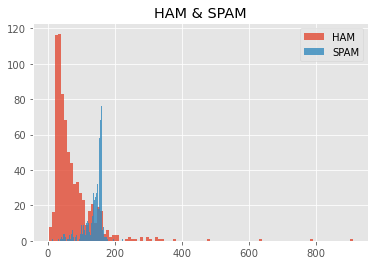

In [29]:
plt.hist(ham['length'], bins=100, label='HAM', alpha =0.8)
plt.hist(spam['length'], bins=100, label='SPAM', alpha =0.8)
plt.title('HAM & SPAM')
plt.legend()
plt.show()

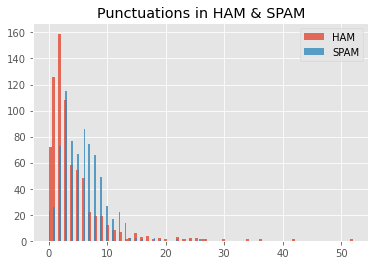

In [30]:
plt.hist(ham['punct'], bins=100, label='HAM', alpha =0.8)
plt.hist(spam['punct'], bins=100, label='SPAM', alpha =0.8)
plt.title('Punctuations in HAM & SPAM')
plt.legend()
plt.show()

## Write code to know if message is Ham or Spam

In [31]:
# text -> numerical -> ML -> Store mode -> Prediction - >Streamlit application -> real world

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], 
                                                    test_size=0.2, random_state = 0,
                                                   shuffle = True, stratify = data['label'])

In [35]:
X_train.shape, X_test.shape

((1195,), (299,))

In [36]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
               ('rf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [37]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf', RandomForestClassifier(n_jobs=-1))])

In [38]:
y_pred = clf.predict(X_test)

In [39]:
y_pred

array(['ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam',
       'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam',
       'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
       'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', '

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.90      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [42]:
clf.predict(['You have won a 10000$ lottery ticket. Click here to claim', 'hi, how are you doing today'])

array(['spam', 'ham'], dtype=object)

In [43]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [44]:
model = pickle.load(open('model.pkl', 'rb'))

In [45]:
model.predict(['You have won a 10000$ lottery ticket. Click here to claim', 'hi, how are you doing today'])

array(['spam', 'ham'], dtype=object)

## Streamlit Application